## 📖 Background
You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers.

After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

## 💾 The data

#### Your team created a file with the following information ([source](https://flavorsofcacao.com)):
- "id" - id number of the review
- "manufacturer" - Name of the bar manufacturer
- "company_location" - Location of the manufacturer
- "year_reviewed" - From 2006 to 2021
- "bean_origin" - Country of origin of the cacao beans
- "bar_name" - Name of the chocolate bar
- "cocoa_percent" - Cocoa content of the bar (%)
- "num_ingredients" - Number of ingredients
- "ingredients" - B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, (Sa) Salt
- "review" - Summary of most memorable characteristics of the chocolate bar
- "rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding

***Acknowledgments**: Brady Brelinski, Manhattan Chocolate Society*

## 💪 Challenge
Create a report to summarize your research. Include:

1. What is the average rating by country of origin?
2. How many bars were reviewed for each of those countries?
3. Create plots to visualize findings for questions 1 and 2.
4. Is the cacao bean's origin an indicator of quality? 
5. [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
6. [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
7. Summarize your findings.

## Summarize
1. There are 67 countries in the dataset. Around 75% of countries have an average rating of chocolate bars greater than 3.0. The top 5 average ratings of chocolate bars are from Chile, U.A.E, Poland, Vietnam, and Australia respectively.

2. Each country making chocolate bars has different reviews, which depends on the number of manufacturers making cholocate bars in a country. The top 4 most viewed chocolate bars countries are the USA, Canada, France, UK, and Italy respectively. USA-made chocolate bars have over 1000 views whereas the rest of the top 3 countries fall in the range of 100 - 200 views. The rest of the countries have less than 100 views on their chocolate bars. 

4. The origin of the cacao bean is one of the indicators of quality after findings. The top 5 beans that have an average rating of less than 4.0 are from Venezuela, Peru, Ecuador, Dominican Republic, and Madagascar. Beans from these regions have the most manufacturers that make chocolate bars.

5. The better rating on average chocolate bars based on bean origin tends to have a lower percentage of cocoa in a chocolate bar, which is around 70%.

6. The average rating of bars with lecithin is 3.15 whereas the average rating of bars without lecithin is 3.23.

To sum up, most companies that make chocolate bars are from the USA, which dominates the most ratings or the number of reviews in the entire dataset. Manufactures like the beans from Venezuela, Peru, Ecuador, Dominican Republic, and Madagascar. The chocolate bar depends on cocoa_percent, the number of ingredients. On average, the top-quality chocolate bars contains 70% cocoa and 3 types of ingredients

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
# Reading in the data
df = pd.read_csv('data/chocolate_bars.csv')

# Take a look at the first datapoints
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


#### What is the average rating by country of origin?

In [4]:
avg_rate_by_country = df.groupby('company_location').agg(avg_rating = ('rating','mean'))
avg_rate_by_country

,avg_rating
company_location,
Amsterdam,3.312500
Argentina,3.305556
Australia,3.358491
Austria,3.258333
Belgium,3.103175
...,...
U.S.A.,3.190801
Vanuatu,2.750000
Venezuela,3.112903


In [5]:
avg_rate_by_country.describe()

,avg_rating
count,67.000000
mean,3.118456
std,0.223693
min,2.625000
25%,3.000000
50%,3.181818
75%,3.261206
max,3.750000


#### How many bars were reviewed for each of those countries?

In [6]:
total_reviews_by_country = df.groupby('company_location').agg(total_reviews = ('review','count'))
total_reviews_by_country

,total_reviews
company_location,
Amsterdam,12
Argentina,9
Australia,53
Austria,30
Belgium,63
...,...
U.S.A.,1136
Vanuatu,4
Venezuela,31


#### Create plots to visualize findings for questions 1 and 2.

In [7]:
def plot_bar(df, title):
    """
    This function is plot bar graph based on dataframe from Q1 and Q2
    input : dataframe
            title  --> show the title of plot as string
    return bar plot graph
    """

    #set fig size
    f, ax = plt.subplots(figsize=(6, 15))
    
    #reset index
    df = df.reset_index()
    col_name1, col_name2 = df.columns
    #sort values descendingly
    df = df.sort_values(by = col_name2, ascending = False)
    sns.barplot(x= col_name2, y = col_name1, data=df)
    ax.set_title(title)
    display(df)

,company_location,avg_rating
8,Chile,3.750000
60,U.A.E.,3.400000
42,Poland,3.375000
65,Vietnam,3.359375
2,Australia,3.358491
...,...,...
63,Vanuatu,2.750000
20,Ghana,2.750000
66,Wales,2.750000
44,Puerto Rico,2.625000


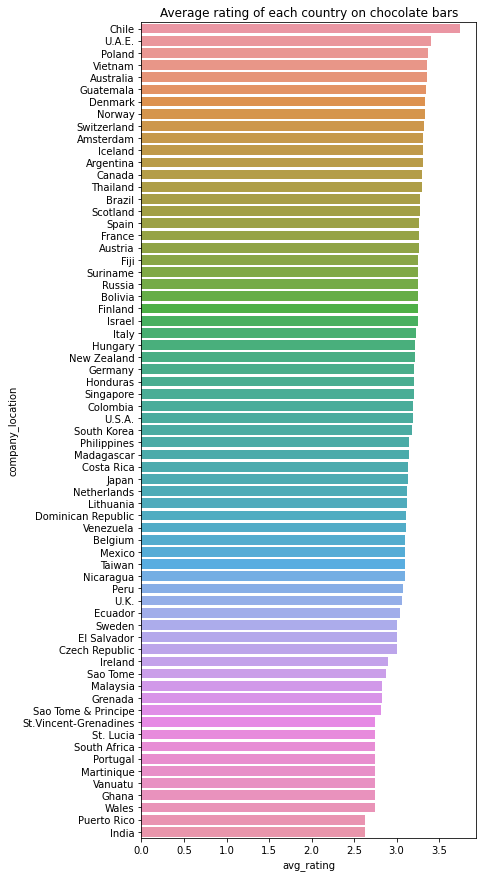

In [8]:
title = "Average rating of each country on chocolate bars"
plot_bar(avg_rate_by_country, title)

,company_location,total_reviews
62,U.S.A.,1136
7,Canada,177
18,France,176
61,U.K.,133
29,Italy,78
...,...,...
54,St.Vincent-Grenadines,1
55,Suriname,1
34,Martinique,1
20,Ghana,1


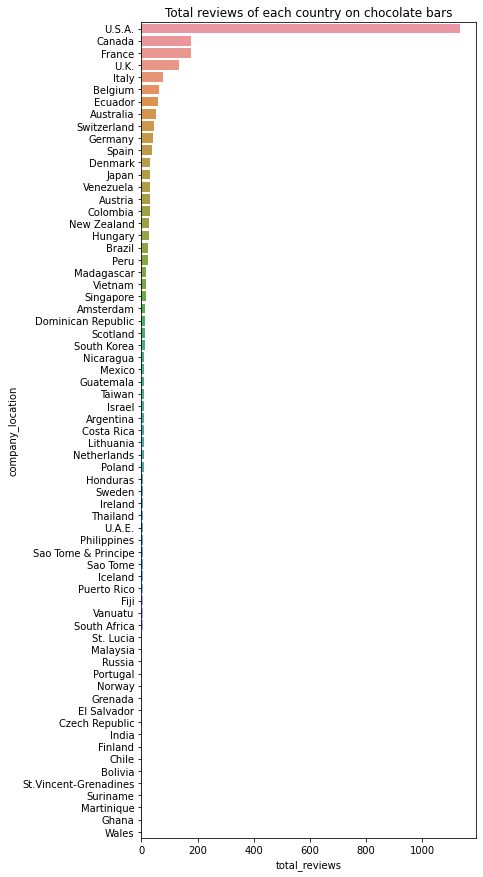

In [9]:
title = "Total reviews of each country on chocolate bars"
plot_bar(total_reviews_by_country, title)

#### Is the cacao bean's origin an indicator of quality?

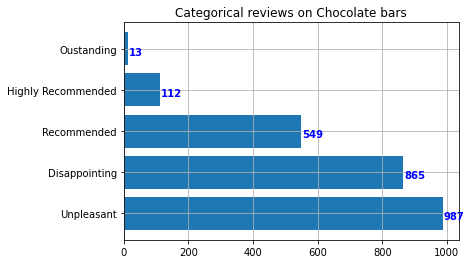

In [10]:
#"rating" - 1.0-1.9 Unpleasant, 2.0-2.9 Disappointing, 3.0-3.49 Recommended, 3.5-3.9 Highly Recommended, 4.0-5.0 Oustanding
ranges = [1.0 ,1.9, 2.9, 3.49, 3.9, 5.0]
labels = ["Unpleasant" , "Disappointing", "Recommended", "Highly Recommended", "Oustanding"]
categorical_values = pd.cut(df.rating, bins= ranges, labels= labels).value_counts()
fig, ax = plt.subplots()
bars = ax.barh(labels,categorical_values)
ax.set_title("Categorical reviews on Chocolate bars")
for i, v in enumerate(categorical_values.values):
    ax.text(v + 3, i - .15, str(v), color='blue', fontweight='bold')
plt.grid()
plt.show()
#categorical_values

In [11]:
def top_5_bean_origin_stats(df):
    """
    This function return a statistic review on top 5 bean origin
    Input : df
    Output: return top 5 beans origin with average cocoa_percent,num_ingredients,rating and total_manufactures
    """
    df = df.groupby('bean_origin').agg(
            avg_cocoa_percent = ("cocoa_percent", 'mean'),
            avg_num_ingredients = ("num_ingredients", 'mean'),
            avg_rating = ('rating', 'mean'),
            total_manufactures = ('company_location','count')).sort_values(by='total_manufactures', ascending = False).head(5)
    return df

In [12]:
#check on orginal datasets
top_5_bean_origin_stats(df)

,avg_cocoa_percent,avg_num_ingredients,avg_rating,total_manufactures
bean_origin,,,,
Venezuela,72.017787,3.162602,3.231225,253
Peru,70.950820,2.935065,3.197746,244
Dominican Republic,71.526549,2.854545,3.215708,226
Ecuador,73.276256,3.134328,3.164384,219
Madagascar,71.237288,2.994152,3.266949,177


In [13]:
#check on rating >= 3.0
ratings = [3.0, 3.5, 4.0]
for i in ratings:
    print("Top 5 average rating greater than ", i)
    display(top_5_bean_origin_stats(df[df.rating >= i]))

Top 5 average rating greater than  3.0


,avg_cocoa_percent,avg_num_ingredients,avg_rating,total_manufactures
bean_origin,,,,
Venezuela,71.668342,3.144330,3.407035,199
Dominican Republic,70.906593,2.870787,3.354396,182
Peru,70.932961,2.897143,3.427374,179
Ecuador,72.104938,3.123377,3.405864,162
Madagascar,70.908163,2.985915,3.384354,147


Top 5 average rating greater than  3.5


,avg_cocoa_percent,avg_num_ingredients,avg_rating,total_manufactures
bean_origin,,,,
Venezuela,71.192661,3.111111,3.676606,109
Peru,70.510000,2.775510,3.670000,100
Ecuador,72.384615,3.159091,3.615385,91
Dominican Republic,70.300000,2.952381,3.620588,85
Madagascar,70.225000,3.076923,3.628125,80


Top 5 average rating greater than  4.0


,avg_cocoa_percent,avg_num_ingredients,avg_rating,total_manufactures
bean_origin,,,,
Venezuela,71.050000,3.100000,4.0,20
Peru,70.000000,3.052632,4.0,19
Madagascar,70.272727,3.363636,4.0,11
Ecuador,70.875000,3.125000,4.0,8
Blend,72.857143,3.285714,4.0,7


Yes, bean origin is one of the indicators to show the quality of making cholocate bars.  
The average ratings are less than 4.0, the top-5 beans are from Venezuela, Peru, Dominican Republic, Ecuador, and Madagascar. They have the highest demand for beans for chocolate bar manufacturing suppliers.

#### [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?

The higher ratings on each average cocoa_percent tends to become less. The average cocoa content for bars has around 70%

For example, Let us focuse on ratings less than 4.0

|bean_origin   | Condition  | avg_cocoa_percent|
| -----------  | -----------| -----------------|
|Venezuela     | NA         | 72.017787        |
|              | rating >3.0| 71.668342        |
|              | rating >3.5| 71.192661        |


|bean_origin   | Condition  | avg_cocoa_percent|
| -----------  | -----------| -----------------|
|Peru          | NA         | 70.950820        |
|              | rating >3.0| 70.932961        |
|              | rating >3.5| 70.510000        |


|bean_origin   | Condition  | avg_cocoa_percent|
| -----------  | -----------| -----------------|
|Ecuador       | NA         | 73.276256        |
|              | rating >3.0| 72.104938        |
|              | rating >3.5| 72.384615        |

|bean_origin   | Condition  | avg_cocoa_percent|
| -----------  | -----------| -----------------|
|Dominican Republic| NA         | 71.526549        |
|                  | rating >3.0| 70.906593        |
|                  | rating >3.5| 70.300000        |

|bean_origin   | Condition  | avg_cocoa_percent|
| -----------  | -----------| -----------------|
|Madagascar    | NA         | 71.526549        |
|              | rating >3.0| 70.908163        |
|              | rating >3.5| 70.225000        |



#### [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).

In [14]:
# the original data contatins missing values on ingredient column, let us drop them
temp_df = df.dropna(subset=['ingredients'])

#with L
avg_rating_with_L = temp_df[temp_df.ingredients.str.contains('L')]['rating'].mean()
print("Average rating of bars with lecithin is", avg_rating_with_L)

#without L
avg_rating_with_L = temp_df[~temp_df.ingredients.str.contains('L')]['rating'].mean()
print("Average rating of bars without lecithin is", avg_rating_with_L)

Average rating of bars with lecithin is 3.150608519269777
Average rating of bars without lecithin is 3.2251282051282053
